In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
features = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "alcohol",
    "sulphates"
]

X = df[features]



In [23]:
#Ellenőrzés
print("Használt feature-ök száma:", len(features))
print("Feature nevek:", features)

X.head()


Használt feature-ök száma: 7
Feature nevek: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'sulphates', 'acid_ratio']


,fixed acidity,volatile acidity,citric acid,residual sugar,alcohol,sulphates,acid_ratio
0,7.4,0.70,0.00,1.9,9.4,0.56,10.571278
1,7.8,0.88,0.00,2.6,9.8,0.68,8.863536
2,7.8,0.76,0.04,2.3,9.8,0.65,10.263023
3,11.2,0.28,0.56,1.9,9.8,0.58,39.998571
4,7.4,0.70,0.00,1.9,9.4,0.56,10.571278


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
df = df.fillna(df.median(numeric_only=True))

In [7]:
# IQR (Interquartile Range) alapú outlier szűrés
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [8]:
print("Eredeti adatok száma:", df.shape)
print("Outlier szűrés utáni adatok száma:", df_clean.shape)


Eredeti adatok száma: (1143, 13)
Outlier szűrés utáni adatok száma: (834, 13)


In [ ]:
# Bináris célváltozó létrehozása
# 1 = jó bor (quality >= 6), 0 = rossz bor
y = (df_clean["quality"] >= 6).astype(int)

print("y eloszlása:")
print(y.value_counts())


y eloszlása:
quality
1    453
0    381
Name: count, dtype: int64


In [10]:
# Új származtatott feature: savarány
df_clean["acid_ratio"] = df_clean["fixed acidity"] / (df_clean["volatile acidity"] + 1e-5)


C:\Temp\ipykernel_6184\1346919654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["acid_ratio"] = df_clean["fixed acidity"] / (df_clean["volatile acidity"] + 1e-5)


In [11]:
df_clean[["fixed acidity", "volatile acidity", "acid_ratio"]].head()


,fixed acidity,volatile acidity,acid_ratio
0,7.4,0.70,10.571278
1,7.8,0.88,8.863536
2,7.8,0.76,10.263023
3,11.2,0.28,39.998571
4,7.4,0.70,10.571278


In [12]:
features = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "alcohol",
    "sulphates",
    "acid_ratio"
]

X = df_clean[features]


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)


X_scaled shape: (834, 7)
y shape: (834,)


In [14]:
print("Standardizált feature mátrix alakja:", X_scaled.shape)
X_scaled[:5]


Standardizált feature mátrix alakja: (834, 7)


array([[-0.48875392,  1.03593488, -1.32811893, -0.64464972, -0.98261879,
        -0.61768532, -0.81341126],
       [-0.20260385,  2.13238177, -1.32811893,  0.92969249, -0.56911072,
         0.43489338, -1.01741919],
       [-0.20260385,  1.40141718, -1.10376179,  0.2549744 , -0.56911072,
         0.1717487 , -0.85023556],
       [ 2.2296717 , -1.52244119,  1.81288099, -0.64464972, -0.56911072,
        -0.44225554,  2.70199201],
       [-0.48875392,  1.03593488, -1.32811893, -0.64464972, -0.98261879,
        -0.61768532, -0.81341126]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(667, 7) (167, 7)
(667,) (167,)


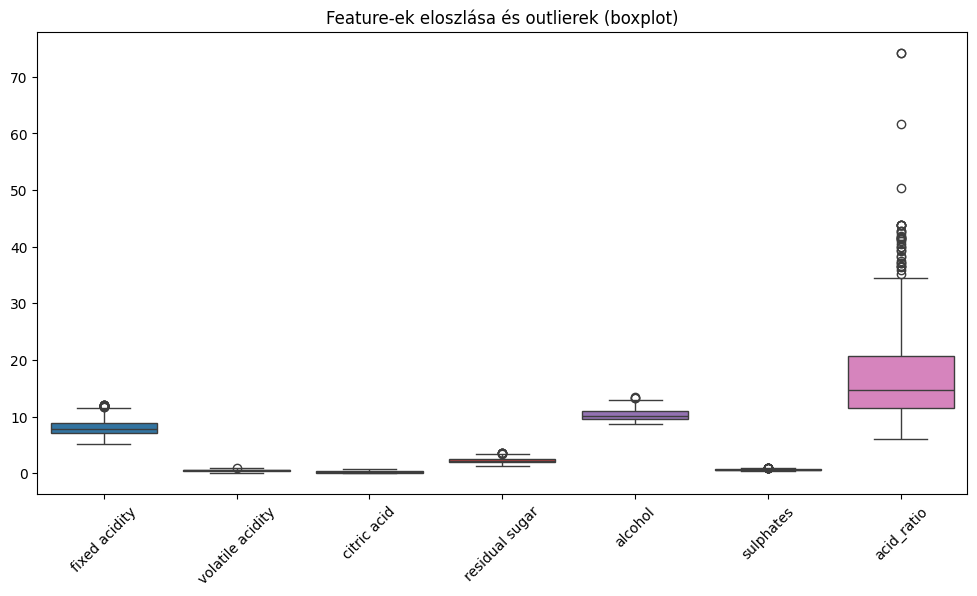

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[features])
plt.title("Feature-ek eloszlása és outlierek (boxplot)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [27]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation="relu"),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.2),

    Dense(32, activation="relu"),
    Dropout(0.2),

    Dense(16, activation="relu"),
    
    Dense(8, activation="relu"),

    Dense(1, activation="sigmoid")
])





c:\Users\Martin\Desktop\EKKE\Beadandó gépi tanulás és adattudomány\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),   
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5652 - loss: 0.6775 - val_accuracy: 0.6407 - val_loss: 0.6480
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5892 - loss: 0.6400 - val_accuracy: 0.7126 - val_loss: 0.6040
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 0.6118 - val_accuracy: 0.7665 - val_loss: 0.5742
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7091 - loss: 0.5968 - val_accuracy: 0.7485 - val_loss: 0.5529
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.5676 - val_accuracy: 0.7844 - val_loss: 0.5289
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7091 - loss: 0.5667 - val_accuracy: 0.7725 - val_loss: 0.5287
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7181 - loss: 0.5613 - val_accuracy: 0.7844 - val_loss: 0.5205
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7241 - loss: 0.5395 - val_accuracy: 0.7725 - val_loss: 0.5

In [30]:
# Pontosság kiértékelése a tanító és teszt adathalmazon
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")



Train accuracy: 0.8876
Test accuracy: 0.8084


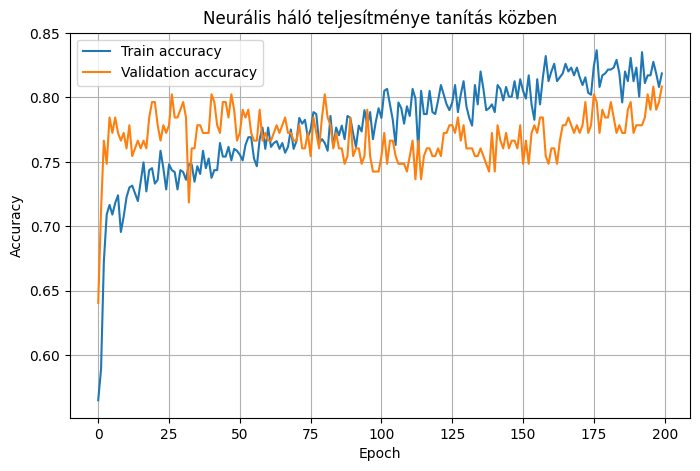

In [31]:
# Tanítás és validáció pontosság vizualizálása
plt.figure(figsize=(8, 5))

plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Neurális háló teljesítménye tanítás közben")
plt.legend()
plt.grid(True)

plt.show()


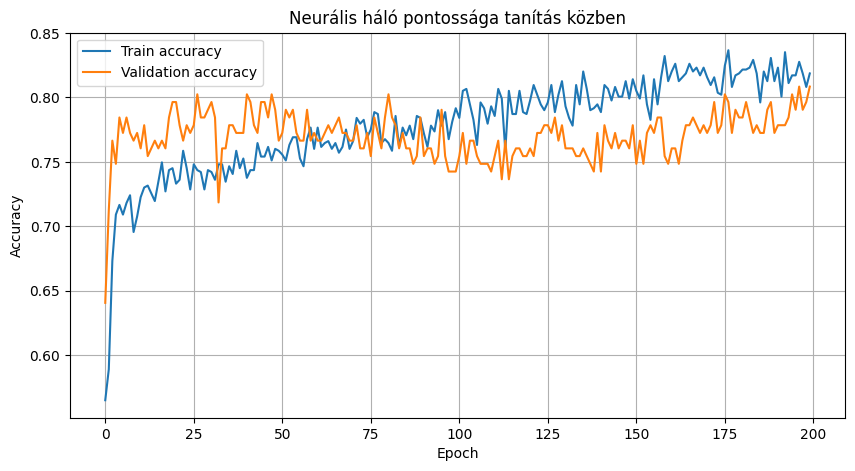

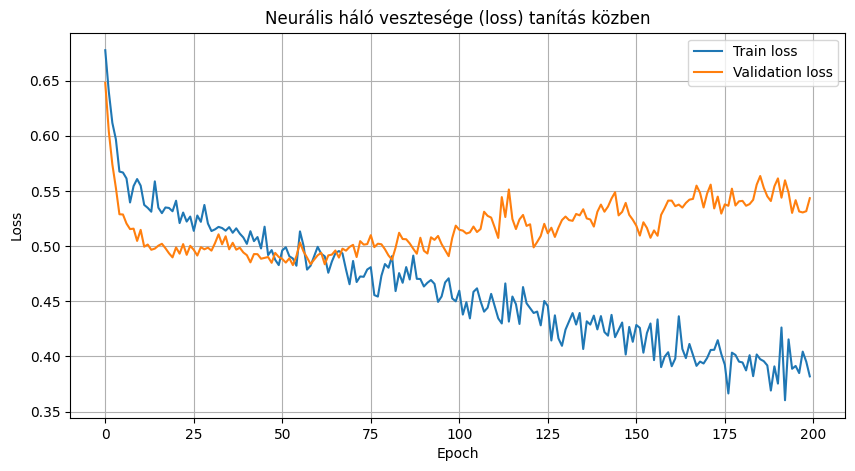

In [32]:
# Tanítás és validáció loss és accuracy vizualizálása
plt.figure(figsize=(10, 5))

# Accuracy görbék
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Neurális háló pontossága tanítás közben")
plt.legend()
plt.grid(True)
plt.show()


# Loss görbék
plt.figure(figsize=(10, 5))

plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Neurális háló vesztesége (loss) tanítás közben")
plt.legend()
plt.grid(True)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


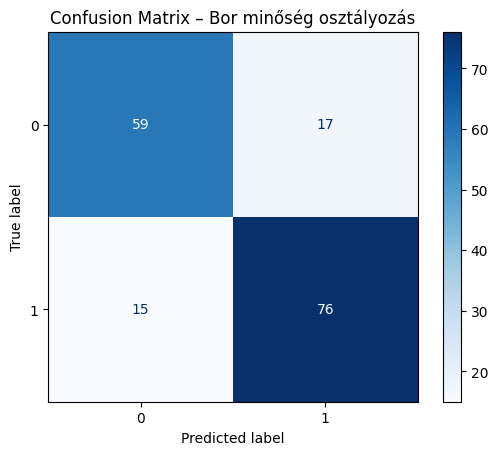

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predikciók a teszt adatokon
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Kirajzolás
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Bor minőség osztályozás")
plt.show()
